Michael Uftring   
Indiana University   
Network Science, Spring 2018   
Week#4 Assignment - Real vs. Random Graphs

# Real vs. Random Networks

In [5]:
from IPython.display import HTML
from IPython.display import SVG
from IPython.display import Image
import networkx as nx

## Les Miserables network analysis

### analysis of the network in Gephi

Calculate and record the number of nodes, number of edges, average degree, average clustering coefficient, and average path length of the graph.

In [47]:
N = 77      # number of vertices (nodes)
L = 254     # number of edges (links)
k = 6.597   # average degree
C = 0.736   # clustering coefficient
d = 2.64    # average path length

Save a plot of the degree distribution of the nodes.

In [64]:
HTML(filename='les-mis-degree-distribution.html')

Select a graph layout that you think best visualizes the graph and save it.

- set the node size by ranking `degree` with min = 10 and max = 50
- set the node color by ranking on `clustering coefficient` (light to dark)
- layout produced by **Force Atlas 2** with default settings, except the following:
  - *Behaviour Alternatives* ~ *Prevent Overlap* : Enabled
  - *Tuning* ~ *Scaling* : 50.0


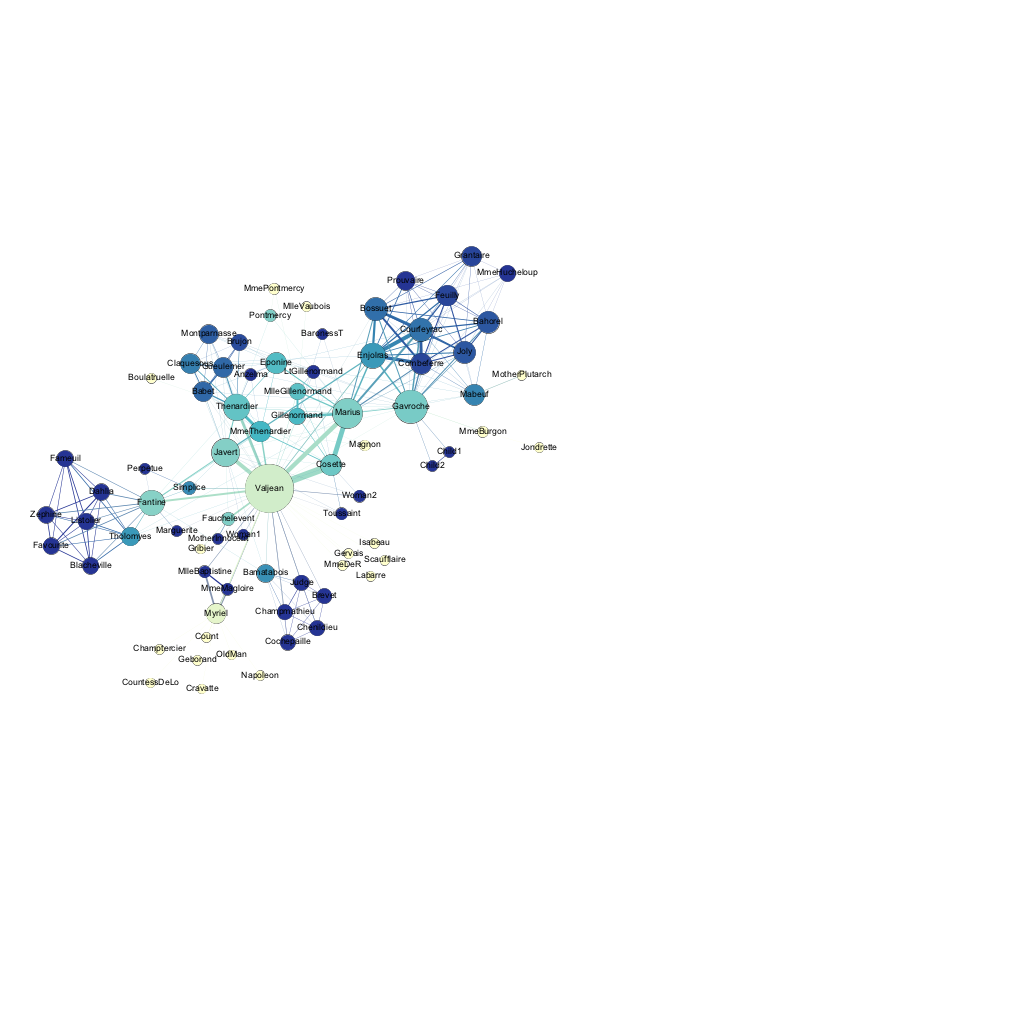

In [6]:
Image(filename='lesmis.png')

## Random network analysis

### Find probability to generate desired random graph

````
<k> = p(N-1)   
p = <k> / (N-1)
```

In [50]:
def probabilityForDegree(N, k):
    return k/(N-1)

In [51]:
# generate with number of vertices and edges in the Les Mis graph
p = probabilityForDegree(N, k)

In [52]:
print(p)

0.08680263157894737


### Create a random graph with Les Mis numbers

In [57]:
G = nx.erdos_renyi_graph(N, p)

In [58]:
print(nx.info(G))

Name: gnp_random_graph(77,0.08680263157894737)
Type: Graph
Number of nodes: 77
Number of edges: 253
Average degree:   6.5714


### save graph to file

In [59]:
filename = "random.gml"
nx.write_gml(G, filename)

### analysis in Gephi

Calculate and record the number of nodes, number of edges, average degree, average clustering coefficient, and average path length of the graph.

In [60]:
N = 77      # number of vertices (nodes)
L = 253     # number of edges (links)
k = 6.571   # average degree
C = 0.100   # clustering coefficient
d = 2.478   # average path length

Save a plot of the degree distribution of the nodes.

In [67]:
HTML(filename='random-network-degree-distribution.html')

Select a graph layout that you think best visualizes the graph and save it.

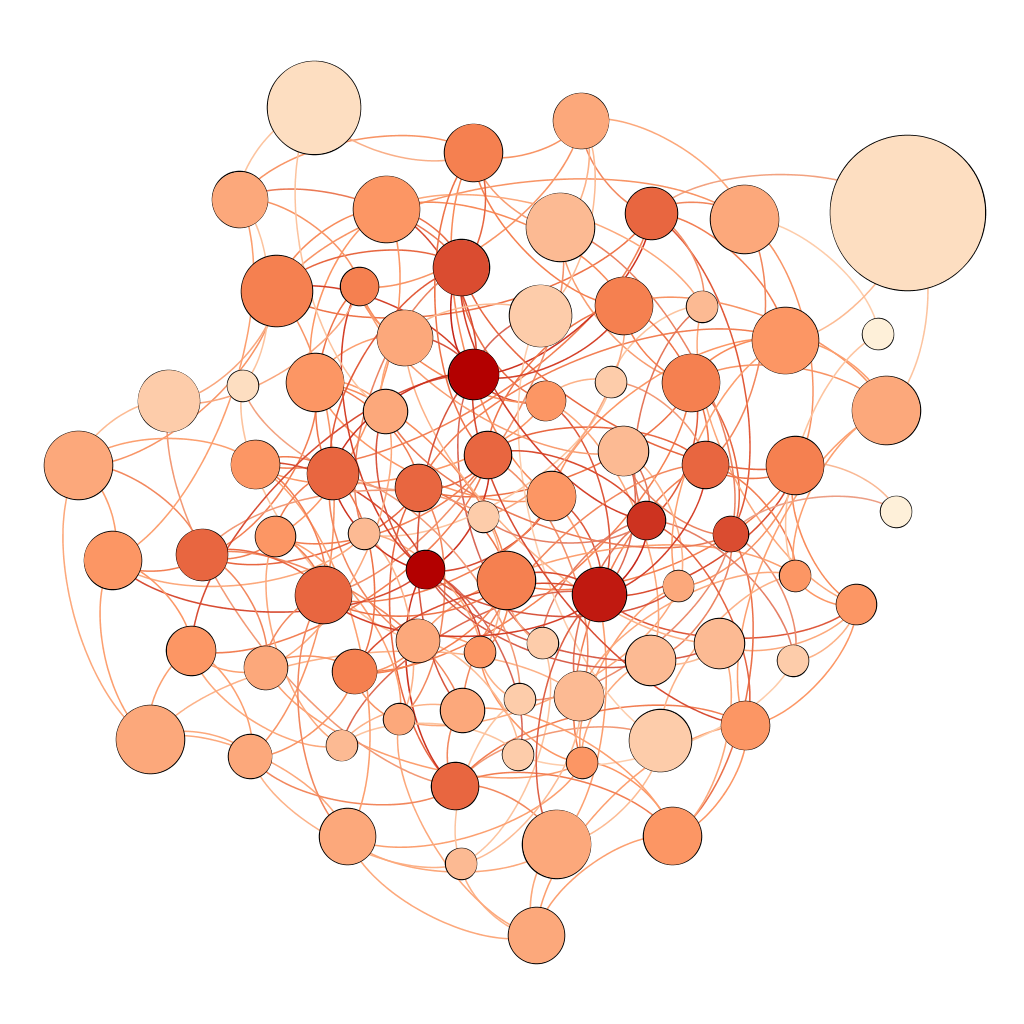

In [8]:
Image(filename='random.png')

# Questions

## 1. How do the degree distributions of the real graph and random graph compare? Explain any differences or similarities you see and consider why they might exist. 

The degree distribution of the real network (Les Miserables) follows an approximately inverse logarithmic curve. The vast majority of the values are to the left of the plot, and a much smaller portion are to the right.

The random network's degree distribution looks much more like a normal distribution: a "bell shaped" curve with a peak at value 6, thus it is following the Binomial or Poisson distribution.

It is unsurprising to see that most nodes in the real network have a degree of 11 or less. This is logical because the interaction of the majority of people is likely more centered around a smaller number of people rather than a greater population. However, it is also not surprising to see some nodes (people) with very high degrees, 22 and 36, because either their personality or occupation might bring them in contact with a greater number of people.

The degree distribution of the random network is pretty much as expected, given how the graph is created. The average degree is 6.5, and the peak in the plot is at 6 (and 7). Recall, the objective when creating the random graph was to achive an average degree similar to that of the real network which was about 6.6. We calculated a probability given a target number of nodes to achive this, and the end result -- from this perspective -- is what we desired and exptected.

## 2. Is the real graph more clustered or less than the random one? What might this tell you about the organizing principles of the real graph?

The (global) clustering coefficient values indicate that the real graph has a tendency towards clustering, whereas the random graph does not. This follows with that which we learned so far and the observations by Watts-Strogatz: mot real networks create groups with a high density of ties. In contrast, the random network will likely have ties which connect groups but the density within a group that increases inter-connectivity will not be present.

## 3. Does the real graph exhibit the small-world property?

The real network has an average path length of 2.64 and (global) clustering coefficient of 0.736, and Watts-Strogatz indicate that small world networks have "distinctive combination of high clustering with short characteristic path length." So, we can conclude that the real graph does exhibit the small-world property.